In [ ]:
"""
Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.
Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.
"""

In [9]:
## Part 1 - Exploratory data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## import json file into a dataframe

filename = "logins.json"
df = pd.read_json(filename)
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [10]:
# check for missing values
print(df.isnull().sum())

login_time    0
dtype: int64


In [11]:
print(df.shape)


(93142, 1)


In [12]:
print(df.dtypes)

login_time    datetime64[ns]
dtype: object


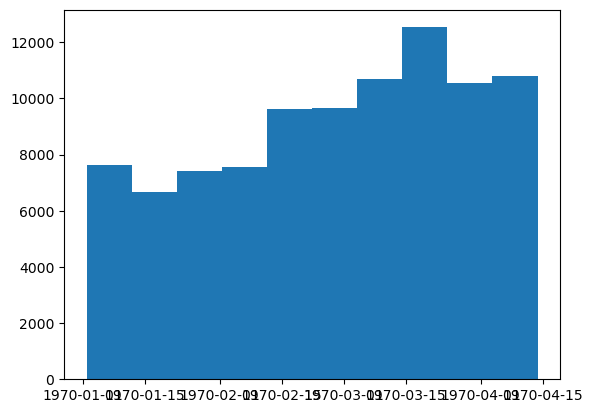

In [13]:
# visualize the distribution of a numeric column
plt.hist(df['login_time'])
plt.show()

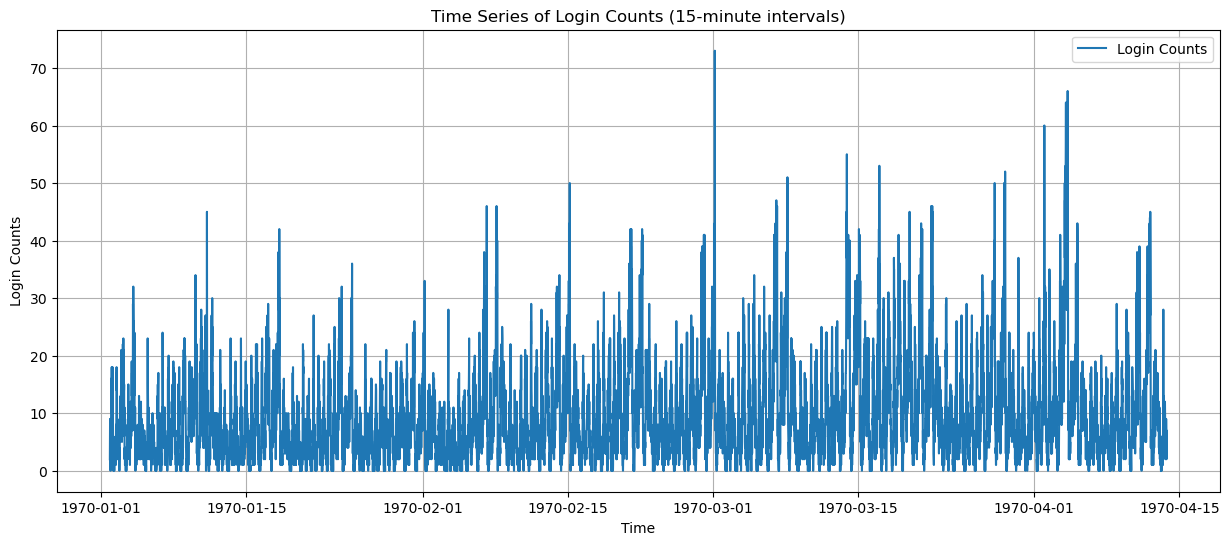

In [17]:
# Set the 'login_time' as the index and resample in 15-minute intervals
logins_df = df
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_resampled = logins_df.resample('15T').sum()

# Plotting the time series of login counts
plt.figure(figsize=(15, 6))
plt.plot(logins_resampled.index, logins_resampled['count'], label='Login Counts')
plt.title('Time Series of Login Counts (15-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#looking at the overall time series shows no real patterns for logins
##Maybe looking at this from a daily or weekly stand point could show things like peak or low time frames. 

In [ ]:
# Lets look at Weekly login countsfor seasonality and trends

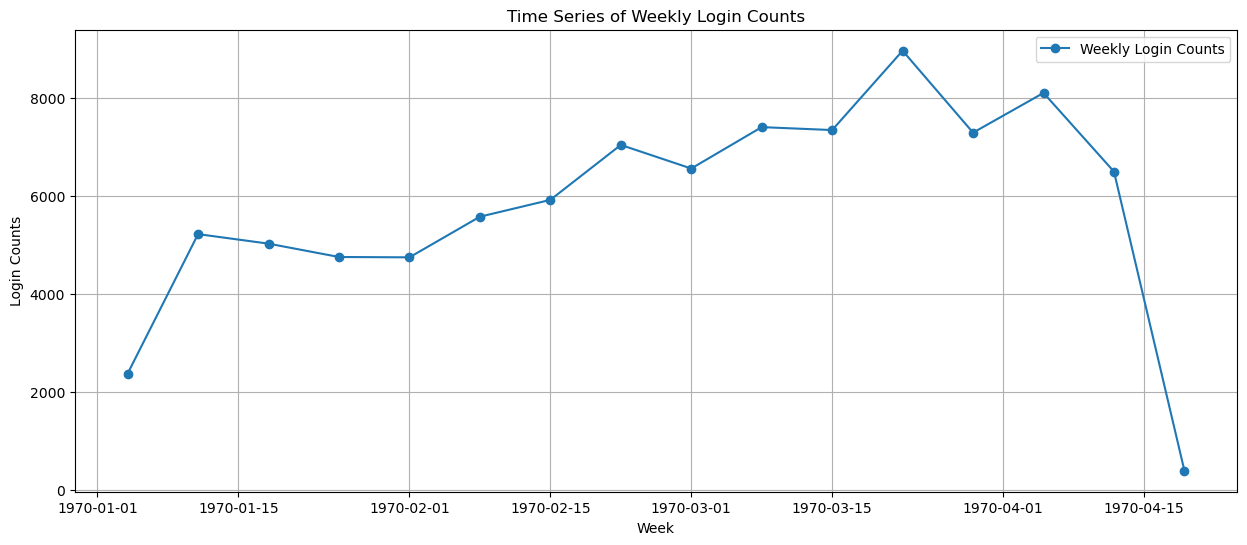

In [18]:
# Resampling the data on a weekly basis to analyze weekly cycles
weekly_logins = logins_df.resample('W').sum()

# Plotting the time series of weekly login counts
plt.figure(figsize=(15, 6))
plt.plot(weekly_logins.index, weekly_logins['count'], label='Weekly Login Counts', marker='o')
plt.title('Time Series of Weekly Login Counts')
plt.xlabel('Week')
plt.ylabel('Login Counts')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# from the weekly graph it looks like there is growth in week over week logins as we go from winter ( Jan) to spring(Apr). 
# I could imagine this data set being website logins for a tax service like turbo tax. 
## We can see the logins drop off completely around april 15th which is normally when taxes are due in the US

In [ ]:
#lets look at Daily login counts for seasonality and trends

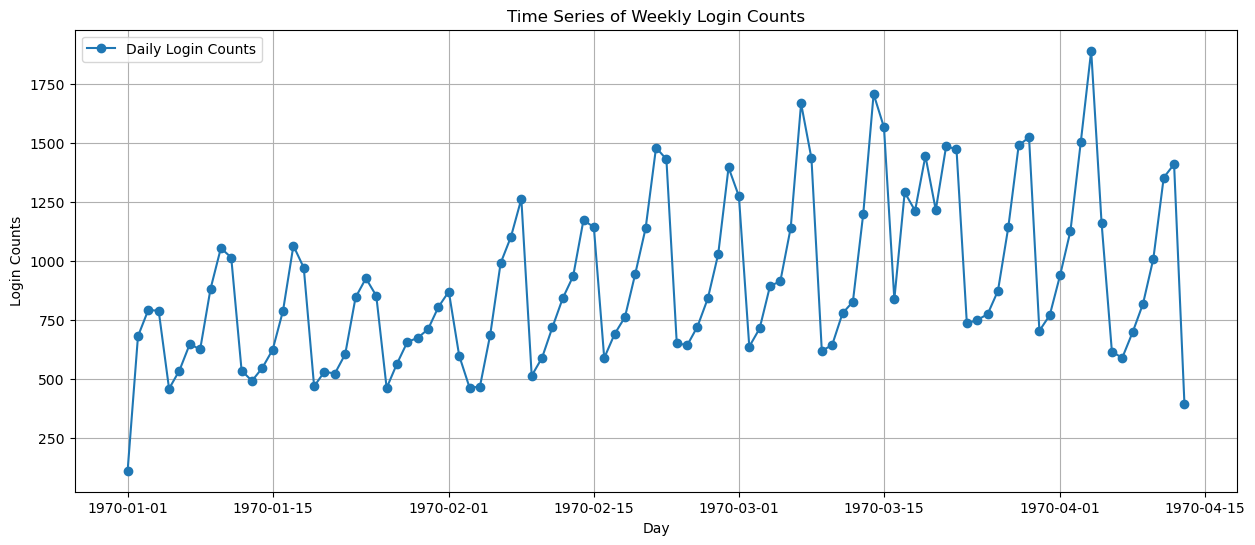

In [19]:
weekly_logins = logins_df.resample('D').sum()

# Plotting the time series of weekly login counts
plt.figure(figsize=(15, 6))
plt.plot(weekly_logins.index, weekly_logins['count'], label='Daily Login Counts', marker='o')
plt.title('Time Series of Weekly Login Counts')
plt.xlabel('Day')
plt.ylabel('Login Counts')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Lets take a look at the times of day when peaks occur. there might be something interesting with that. 

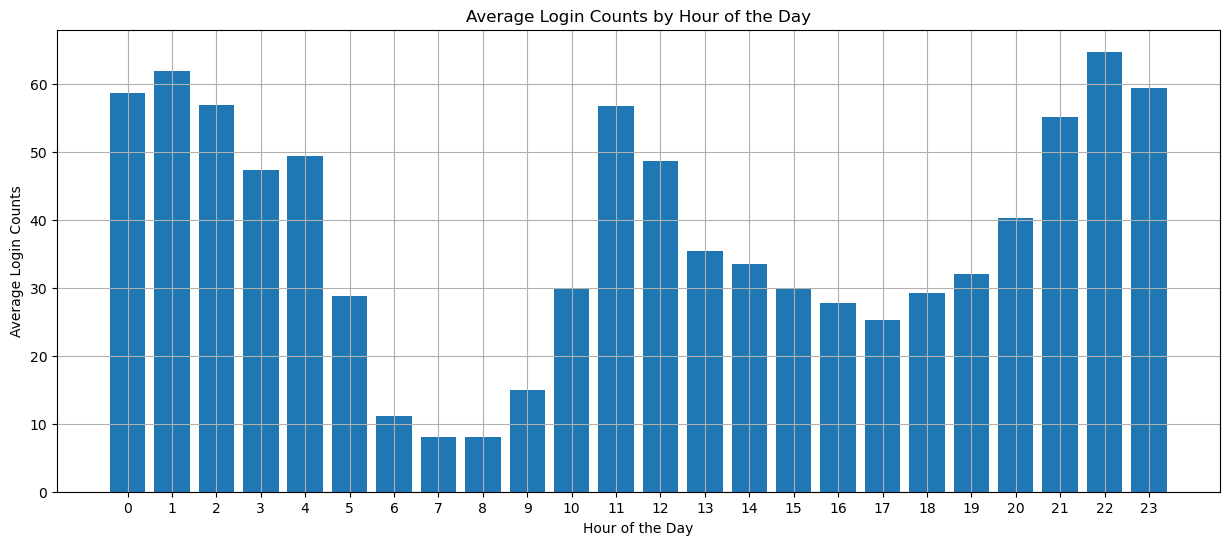

In [20]:
hourly_logins = logins_df.resample('H').sum()

# Group by hour of the day and calculate the mean to find the average login count for each hour across all days
average_hourly_logins = hourly_logins.groupby(hourly_logins.index.hour).mean()

# Plotting the average hourly login counts
plt.figure(figsize=(15, 6))
plt.bar(average_hourly_logins.index, average_hourly_logins['count'])
plt.title('Average Login Counts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Login Counts')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour of the day
plt.grid(True)
plt.show()

In [ ]:
# it looks like peak times occur during the very late or early hours of the day.  starting from 10pm to 2 AM the next day. 
# there doesnt appear to be any data quality issues with the data set. 

In [ ]:
"""
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.
"""

In [ ]:
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
 I would chose a measure for success is cross-city trips where one trip starts in one city and ends in the other
    This measure would be quatifiable and could show the  the impact of toll reimbursement.  One would exepect
    if an increase in between city trips  could show that the remibursement toll offer is a postive incentment

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. 

Please provide details on:
    
a) how you will implement the experiment 
    I would sset up  a control and experiment group. one group recieves toll reimbursement, which will be the experimental group.
    the other group, the control, would have no reimbursement. we could track this over the course of 1 to 2 months that allows
    tracking of existing traffic parterns and variations on a weekly basis. From a data collection perspective we could track the 
    overall trip frequency to account for other outside influences. 

b) what statistical test(s) you will conduct to verify the significance of the
observation

    Im thinking a T-test would be useful here to determine if the control and experimental groups have a statistically
    significance for the cross city trips.
    
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
     Lets say that for that t-test ( 2 sample) statistical analysis there was no change in behavior ( decrease/increase)
    it could indicate other factors at play, like operation hours are factoring in. 
    IF the test showed a positive outcome then it would suggest a successfull reimbursement campaign.
    Some caveats to consider are seasonal changes in traffic flows, holidays or other large events. Longer term study would be necessary
    to address those caveats. 
    


In [ ]:
"""

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice)"""


In [21]:
filename = "ultimate_data_challenge.json"
udf = pd.read_json(filename)
udf.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
